In [1]:
import numpy as np

In [2]:
x_cons_data= np.load('../high_psi dataset/x_cons_data.npy')
hx_three_data= np.load('../high_psi dataset/x_three_data.npy')
lx_three_data= np.load('../low_psi_data/x_three_data.npy')

In [3]:
# one hot encoded+conservation ( consrv was not used in our paper)
x_cons_data.shape,hx_three_data.shape,lx_three_data.shape

((39128, 283, 5), (1388, 283, 5), (944, 283, 5))

In [4]:
def cross_split(x_cons_data,hx_three_data,lx_three_data,s):
    
    a=int(x_cons_data.shape[0]/10)
    b=int(hx_three_data.shape[0]/10)
    c=int(lx_three_data.shape[0]/10)
    
    #9 folds for training
    train=x_cons_data[:a*s]
    train=np.concatenate((train,x_cons_data[a*(s+1):]),axis=0)

    d=int((9*a)/(9*(b+c)))
    print(d)
    for i in range (d):
        train=np.concatenate((train,hx_three_data[:b*s]),axis=0)
        train=np.concatenate((train,hx_three_data[b*(s+1):]),axis=0)
    
        train=np.concatenate((train,lx_three_data[:c*s]),axis=0)
        train=np.concatenate((train,lx_three_data[c*(s+1):]),axis=0)
      
    np.random.shuffle(train)
    np.random.shuffle(train)
    
    # 1 fold for testing
    
    htest=np.concatenate((hx_three_data[b*s:b*(s+1)],x_cons_data[a*s:a*(s+1)]),axis=0)
    lt=   np.concatenate((lx_three_data[c*s:c*(s+1)],x_cons_data[a*s:a*(s+1)]),axis=0)

    test=htest
    test=np.concatenate((test,lx_three_data[c*s:c*(s+1)]),axis=0)
    
    
    return train,test,htest,lt


In [5]:
l=141

In [6]:
train,test,htest,ltest=cross_split(x_cons_data[:24320],hx_three_data,lx_three_data,1)

y_train=train[:,l-1,0]
y_test=test[:,l-1,0]
hy_test=htest[:,l-1,0]
ly_test=ltest[:,l-1,0]

train.shape,test.shape,htest.shape

10


((42888, 283, 5), (2664, 283, 5), (2570, 283, 5))

In [7]:
def evaluate_AUC():
    ypreds=model.predict([htest[:,:l-1,:4],htest[:,-1,0:3]])
    fpr, tpr, thresholds = roc_curve(hy_test, ypreds)
    roc_auc = auc(fpr, tpr)
    
    ypreds2=model.predict([test[:,:l-1,:4],test[:,-1,0:3]])
    fpr2, tpr2, thresholds2 = roc_curve(y_test, ypreds2)
    roc_auc2 = auc(fpr2, tpr2)
    
    ypreds3=model.predict([ltest[:,:l-1,:4],ltest[:,-1,0:3]])
    fpr3, tpr3, thresholds3 = roc_curve(ly_test, ypreds3)
    roc_auc3 = auc(fpr3, tpr3)
    

    lw=2
    
    
    
    f=plt.figure()
    plt.plot(fpr2, tpr2, color='orange', lw=1, label=    'All ALT3 events (AUC= %0.2f)' % roc_auc2)
    
    plt.plot(fpr, tpr, color='red', lw=1,          label='HEvents ALT3 subset (AUC= %0.2f)' % roc_auc)
    
    plt.plot(fpr3, tpr3, color='navy', lw=1,       label='MREvents ALT3 subset (AUC= %0.2f)' % roc_auc3)

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    
    f.savefig("../plots/3.pdf", bbox_inches='tight')

    plt.show()


    return

In [8]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [9]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, LSTM
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.optimizers import SGD
from keras.layers.wrappers import Bidirectional, TimeDistributed
from keras import regularizers
from keras import optimizers
from keras.layers import Input, BatchNormalization
from keras.models import Model
from sklearn import metrics
import tensorflow as tf
from tensorflow.contrib.keras import layers

Using TensorFlow backend.


In [10]:
from keras import regularizers

In [11]:
from keras import regularizers
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from keras import initializers
from keras.layers import Activation, Dense, Add

In [12]:
inputs1 = Input(shape=(l-1, 4))
inputs3 = Input(shape=(3,))


x=Conv1D(filters=32,kernel_size=7,strides=1,kernel_initializer=initializers.random_uniform(),padding="same") (inputs1)
x=Dropout(0.2)(x)
x=Activation('relu')(x)
x=MaxPooling1D(pool_size=2, strides=2)(x)

x=Conv1D(filters=8,kernel_size=4,strides=1,kernel_initializer=initializers.random_uniform()) (x)
x=Dropout(0.2)(x)
x=Activation('relu')(x)
x=MaxPooling1D(pool_size=2, strides=2)(x)


x=Conv1D(filters=8,kernel_size=3,strides=1,kernel_initializer=initializers.random_uniform()) (x)
x=Dropout(0.2)(x)
x=Activation('relu')(x)
x=MaxPooling1D(pool_size=2, strides=2)(x)







x2=Flatten()(x)


x2=keras.layers.concatenate([x2,inputs3],axis=1)





x3=Dense(32, activation='relu',)(x2)
x3=Dropout(0.5)(x3)


x3=Dense(1, activation='sigmoid',  )(x3)


model = Model(inputs=[inputs1,inputs3], outputs=x3)




model.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(lr=0.00005,
                                        beta_1=0.9,
                                        beta_2=0.999,
                                        epsilon=1e-08,
                                        decay=0.0),metrics=['accuracy'])



print (model.summary())


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 140, 4)       0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 140, 32)      928         input_1[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 140, 32)      0           conv1d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 140, 32)      0           dropout_1[0][0]                  
__________________________________________________________________________________________________
max_poolin

In [13]:
for i in range (150):
    

    
    print('epoch :',i)
    model.fit([train[:,:l-1,:4],train[:,-1,0:3]], y_train,validation_data=([test[:,:l-1,:4],test[:,-1,0:3]], y_test), epochs = 1, verbose = 1, batch_size = 126)
    y_=model.predict([htest[:,:l-1,:4],htest[:,-1,0:3]])
    print("AUC under ROC for high inclusion exons:",roc_auc_score(hy_test, y_))

epoch : 0
Train on 42888 samples, validate on 2664 samples
Epoch 1/1
42888/42888 [==============================] - 11s 266us/step - loss: 0.6978 - acc: 0.5185 - val_loss: 0.6866 - val_acc: 0.5383
AUC under ROC for high inclusion exons: 0.5004380005720823
epoch : 1
Train on 42888 samples, validate on 2664 samples
Epoch 1/1
42888/42888 [==============================] - 3s 73us/step - loss: 0.6934 - acc: 0.5332 - val_loss: 0.6642 - val_acc: 0.8033
AUC under ROC for high inclusion exons: 0.5989657823226545
epoch : 2
Train on 42888 samples, validate on 2664 samples
Epoch 1/1
42888/42888 [==============================] - 3s 70us/step - loss: 0.6835 - acc: 0.5772 - val_loss: 0.6780 - val_acc: 0.5980
AUC under ROC for high inclusion exons: 0.6205276268115942
epoch : 3
Train on 42888 samples, validate on 2664 samples
Epoch 1/1
42888/42888 [==============================] - 3s 68us/step - loss: 0.6773 - acc: 0.5851 - val_loss: 0.6643 - val_acc: 0.6348
AUC under ROC for high inclusion exons: 0

42888/42888 [==============================] - 3s 72us/step - loss: 0.5987 - acc: 0.6792 - val_loss: 0.5802 - val_acc: 0.7361
AUC under ROC for high inclusion exons: 0.7336420194508009
epoch : 33
Train on 42888 samples, validate on 2664 samples
Epoch 1/1
42888/42888 [==============================] - 3s 64us/step - loss: 0.5959 - acc: 0.6817 - val_loss: 0.5650 - val_acc: 0.7613
AUC under ROC for high inclusion exons: 0.7339608361937453
epoch : 34
Train on 42888 samples, validate on 2664 samples
Epoch 1/1
42888/42888 [==============================] - 3s 73us/step - loss: 0.5933 - acc: 0.6836 - val_loss: 0.5992 - val_acc: 0.7087
AUC under ROC for high inclusion exons: 0.7361508390541571
epoch : 35
Train on 42888 samples, validate on 2664 samples
Epoch 1/1
42888/42888 [==============================] - 3s 64us/step - loss: 0.5938 - acc: 0.6854 - val_loss: 0.5725 - val_acc: 0.7451
AUC under ROC for high inclusion exons: 0.7357396548436307
epoch : 36
Train on 42888 samples, validate on 266

42888/42888 [==============================] - 3s 68us/step - loss: 0.5495 - acc: 0.7102 - val_loss: 0.5187 - val_acc: 0.7932
AUC under ROC for high inclusion exons: 0.748060283180778
epoch : 65
Train on 42888 samples, validate on 2664 samples
Epoch 1/1
42888/42888 [==============================] - 3s 69us/step - loss: 0.5481 - acc: 0.7145 - val_loss: 0.5192 - val_acc: 0.7924
AUC under ROC for high inclusion exons: 0.7486204471777269
epoch : 66
Train on 42888 samples, validate on 2664 samples
Epoch 1/1
42888/42888 [==============================] - 3s 63us/step - loss: 0.5493 - acc: 0.7117 - val_loss: 0.5142 - val_acc: 0.8003
AUC under ROC for high inclusion exons: 0.7499865918192219
epoch : 67
Train on 42888 samples, validate on 2664 samples
Epoch 1/1
42888/42888 [==============================] - 3s 74us/step - loss: 0.5476 - acc: 0.7152 - val_loss: 0.5026 - val_acc: 0.8104
AUC under ROC for high inclusion exons: 0.7497109792143402
epoch : 68
Train on 42888 samples, validate on 2664

42888/42888 [==============================] - 3s 63us/step - loss: 0.5283 - acc: 0.7276 - val_loss: 0.4731 - val_acc: 0.8300
AUC under ROC for high inclusion exons: 0.7598147883295194
epoch : 97
Train on 42888 samples, validate on 2664 samples
Epoch 1/1
42888/42888 [==============================] - 3s 61us/step - loss: 0.5278 - acc: 0.7283 - val_loss: 0.4913 - val_acc: 0.8059
AUC under ROC for high inclusion exons: 0.760088911136537
epoch : 98
Train on 42888 samples, validate on 2664 samples
Epoch 1/1
42888/42888 [==============================] - 3s 72us/step - loss: 0.5269 - acc: 0.7287 - val_loss: 0.4816 - val_acc: 0.8221
AUC under ROC for high inclusion exons: 0.7597641352021357
epoch : 99
Train on 42888 samples, validate on 2664 samples
Epoch 1/1
42888/42888 [==============================] - 3s 69us/step - loss: 0.5288 - acc: 0.7267 - val_loss: 0.4819 - val_acc: 0.8213
AUC under ROC for high inclusion exons: 0.7594959715865751
epoch : 100
Train on 42888 samples, validate on 266

42888/42888 [==============================] - 3s 70us/step - loss: 0.5192 - acc: 0.7341 - val_loss: 0.4589 - val_acc: 0.8300
AUC under ROC for high inclusion exons: 0.7600322988176964
epoch : 129
Train on 42888 samples, validate on 2664 samples
Epoch 1/1
42888/42888 [==============================] - 3s 66us/step - loss: 0.5179 - acc: 0.7349 - val_loss: 0.4759 - val_acc: 0.8093
AUC under ROC for high inclusion exons: 0.7605030749427917
epoch : 130
Train on 42888 samples, validate on 2664 samples
Epoch 1/1
42888/42888 [==============================] - 3s 68us/step - loss: 0.5159 - acc: 0.7356 - val_loss: 0.4623 - val_acc: 0.8236
AUC under ROC for high inclusion exons: 0.7601306254767354
epoch : 131
Train on 42888 samples, validate on 2664 samples
Epoch 1/1
42888/42888 [==============================] - 3s 72us/step - loss: 0.5174 - acc: 0.7370 - val_loss: 0.4814 - val_acc: 0.8044
AUC under ROC for high inclusion exons: 0.7602170337528604
epoch : 132
Train on 42888 samples, validate on

In [14]:
y1_=model.predict([htest[:,:l-1,:4],htest[:,-1,0:3]])
ac1 = roc_auc_score(hy_test, y1_)

y2_=model.predict([ltest[:,:l-1,:4],ltest[:,-1,0:3]])
ac3 = roc_auc_score(ly_test, y2_)

y_=model.predict([test[:,:l-1,:4],test[:,-1,0:3]])
ac2 = roc_auc_score(y_test, y_)
ac1,ac3,ac2

(0.7614505863844394, 0.8660589305711086, 0.803835001701452)

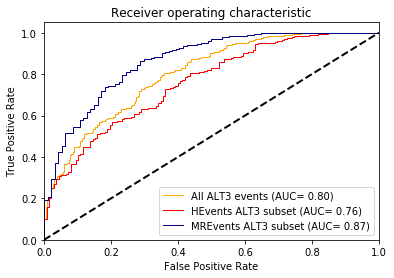

In [15]:
evaluate_AUC()